# Data Cleaning for Our Dataset
### Evan Schubert
### CSC 2621-141
### Created on: 04/10/2025

What Each Column Represents
Transaction_ID - arbitrary unique ID given to each transaction<br>
User_ID - The unique identifier for each user<br>
Transaction Amount - amount of money transacted<br>
Transaction Type - ATM withdrawal, Bill Payment, POS payment, bank transfer, online purchase<br>
Time of Transaction - Military time for the time the transaction occured, 0 through 23<br>
Device Used - Tablet, mobile, desktop, unknown device<br>
Location - San Francisco, New York, Chicago, Boston, Houston, Miami, Los Angeles, Seattle<br>
Previous Fraudulent Transactions - How many previous fraudelent transactions does this user have, 0 through 4<br>
Account Age - How long the account has been active in possibly months, 0 through 119<br>
Number of Transactions last 24H - The number of transactions in the last 24 hours for this user, 1 through 14<br>
Payment Method - Debit card, credit card, UPI, net banking, invalid method<br>
Fraudulent - boolean representing whether the transaction was fraudulent.<br>

In [20]:
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats import stats, linregress, kruskal, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

fraud_df = pd.read_csv("Fraud Detection Dataset.csv")

In [22]:
fraud_df.dropna(inplace = True, subset = ['Device_Used', 'Location', 'Payment_Method'])

In [24]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43869 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    43869 non-null  object 
 1   User_ID                           43869 non-null  int64  
 2   Transaction_Amount                41687 non-null  float64
 3   Transaction_Type                  43869 non-null  object 
 4   Time_of_Transaction               41654 non-null  float64
 5   Device_Used                       43869 non-null  object 
 6   Location                          43869 non-null  object 
 7   Previous_Fraudulent_Transactions  43869 non-null  int64  
 8   Account_Age                       43869 non-null  int64  
 9   Number_of_Transactions_Last_24H   43869 non-null  int64  
 10  Payment_Method                    43869 non-null  object 
 11  Fraudulent                        43869 non-null  int64  
dtypes: float6

In [26]:
fraud_df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
5,T6,2095,2372.04,ATM Withdrawal,15.0,Desktop,Boston,3,96,14,Credit Card,0


In [28]:
print(fraud_df.columns)

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Time_of_Transaction', 'Device_Used', 'Location',
       'Previous_Fraudulent_Transactions', 'Account_Age',
       'Number_of_Transactions_Last_24H', 'Payment_Method', 'Fraudulent'],
      dtype='object')


In [30]:
fraud_df = fraud_df.astype({ 'Transaction_Type': 'category', 'Device_Used': 'category', 'Location': 'category','Payment_Method': 'category'})

## Filling in missing values

In [33]:
fraud_df["Transaction_Amount_fill_mean"] = fraud_df["Transaction_Amount"]
fraud_df["Transaction_Amount_fill_median"] = fraud_df["Transaction_Amount"]
fraud_df["Transaction_Amount_fill_mode"] = fraud_df["Transaction_Amount"]

values = {"Transaction_Amount_fill_mean": fraud_df["Transaction_Amount"].mean(), "Transaction_Amount_fill_median": fraud_df["Transaction_Amount"].median(), 
         "Transaction_Amount_fill_mode": stats.mode(fraud_df["Transaction_Amount"], nan_policy="omit").mode}
fraud_df.fillna(value = values, inplace = True)

C:\Users\munteand\AppData\Local\Temp\ipykernel_13532\4240512889.py:6: DeprecationWarning: Please import `mode` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  "Transaction_Amount_fill_mode": stats.mode(fraud_df["Transaction_Amount"], nan_policy="omit").mode}


In [35]:
fraud_df.head(10)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent,Transaction_Amount_fill_mean,Transaction_Amount_fill_median,Transaction_Amount_fill_mode
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0,1292.760000,1292.76,1292.76
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0,1554.580000,1554.58,1554.58
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0,100.100000,100.10,100.10
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0,1490.500000,1490.50,1490.50
5,T6,2095,2372.04,ATM Withdrawal,15.0,Desktop,Boston,3,96,14,Credit Card,0,2372.040000,2372.04,2372.04
6,T7,4772,544.81,Bill Payment,2.0,Tablet,Boston,3,6,9,UPI,1,544.810000,544.81,544.81
7,T8,4092,635.75,ATM Withdrawal,13.0,Tablet,Boston,2,13,10,Debit Card,0,635.750000,635.75,635.75
8,T9,2638,2318.87,Bank Transfer,NaN,Mobile,San Francisco,4,110,12,Debit Card,0,2318.870000,2318.87,2318.87
9,T10,3169,3656.17,Bill Payment,3.0,Mobile,Chicago,4,66,3,Net Banking,0,3656.170000,3656.17,3656.17
10,T11,1466,NaN,Online Purchase,3.0,Tablet,Houston,1,4,6,Net Banking,0,2993.984644,2522.53,49997.80


### Visualization

C:\Users\munteand\AppData\Local\Temp\ipykernel_13532\3610829514.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  type_table = pd.pivot_table(fraud_df, index="Fraudulent", values="Transaction_ID", columns="Transaction_Type", aggfunc="count")


<Axes: xlabel='Transaction_Type', ylabel='Fraudulent'>

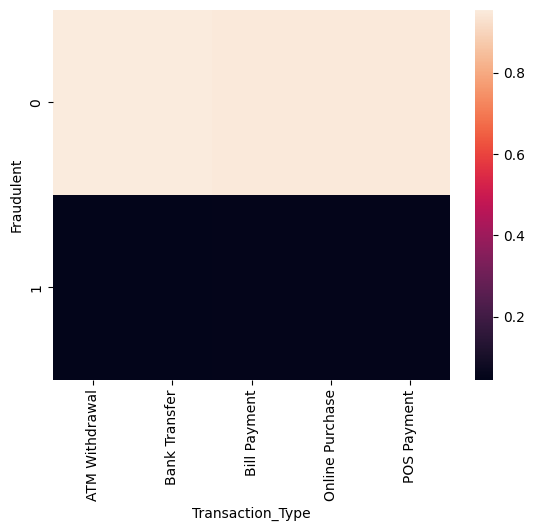

In [53]:
type_table = pd.pivot_table(fraud_df, index="Fraudulent", values="Transaction_ID", columns="Transaction_Type", aggfunc="count")
type_table["ATM Withdrawal"] = type_table["ATM Withdrawal"]/(type_table["ATM Withdrawal"].sum())
type_table["Bank Transfer"] = type_table["Bank Transfer"]/(type_table["Bank Transfer"].sum())
type_table["Bill Payment"] = type_table["Bill Payment"]/(type_table["Bill Payment"].sum())
type_table["Online Purchase"] = type_table["Online Purchase"]/(type_table["Online Purchase"].sum())
type_table["POS Payment"] = type_table["POS Payment"]/(type_table["POS Payment"].sum())
sns.heatmap(type_table)

In [55]:
device_table = pd.pivot_table(fraud_df, index="Fraudulent", values="Transaction_ID", columns="Device_Used", aggfunc="count")
#type_table["ATM Withdrawal"] = type_table["ATM Withdrawal"]/(type_table["ATM Withdrawal"].sum())
device_table
#sns.heatmap(device_table)

C:\Users\munteand\AppData\Local\Temp\ipykernel_13532\2913651119.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  device_table = pd.pivot_table(fraud_df, index="Fraudulent", values="Transaction_ID", columns="Device_Used", aggfunc="count")


Device_Used,Desktop,Mobile,Tablet,Unknown Device
Fraudulent,,,,
0,13564,13384,13467,1304
1,676,740,671,63


In [57]:
location_table = pd.pivot_table(fraud_df, index="Fraudulent", values="Transaction_ID", columns="Location", aggfunc="count")
#type_table["ATM Withdrawal"] = type_table["ATM Withdrawal"]/(type_table["ATM Withdrawal"].sum())
location_table
#sns.heatmap(device_table)

C:\Users\munteand\AppData\Local\Temp\ipykernel_13532\2525211817.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  location_table = pd.pivot_table(fraud_df, index="Fraudulent", values="Transaction_ID", columns="Location", aggfunc="count")


Location,Boston,Chicago,Houston,Los Angeles,Miami,New York,San Francisco,Seattle
Fraudulent,,,,,,,,
0,5314,5197,5149,5184,5161,5251,5189,5274
1,274,303,253,285,269,259,269,238


In [59]:
method_table = pd.pivot_table(fraud_df, index="Fraudulent", values="Transaction_ID", columns="Payment_Method", aggfunc="count")
#type_table["ATM Withdrawal"] = type_table["ATM Withdrawal"]/(type_table["ATM Withdrawal"].sum())
method_table
#sns.heatmap(device_table)

C:\Users\munteand\AppData\Local\Temp\ipykernel_13532\56519413.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  method_table = pd.pivot_table(fraud_df, index="Fraudulent", values="Transaction_ID", columns="Payment_Method", aggfunc="count")


Payment_Method,Credit Card,Debit Card,Invalid Method,Net Banking,UPI
Fraudulent,,,,,
0,9996,10158,1320,10016,10229
1,515,519,65,525,526


Text(0.5, 1.0, 'Fraudulent Vs Transaction Amount')

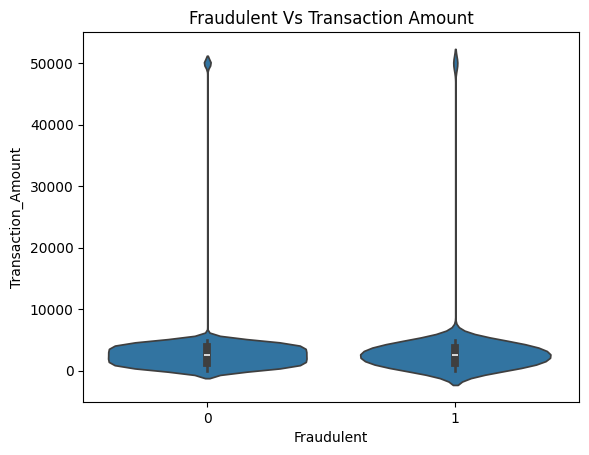

In [63]:
amount_plot = sns.violinplot(data=fraud_df, x="Fraudulent", y="Transaction_Amount")
amount_plot.set_title("Fraudulent Vs Transaction Amount")

### Statistical Testing

In [ ]:
#Kruskal
#Transaction_Amount, Time_of_Transaction, Previous_Fraudulent_Transactions, Account_Age, Number_of_Transactions_Last_24H
#Chai Square
#Transaction_Type, Device_Used, Location, Payment_Method
X = ["Transaction_Amount", "Time_of_Transaction", "Previous_Fraudulent_Transactions", "Account_Age", "Number_of_Transactions_Last_24H", 
    "Transaction_Type", "Device_Used", "Location", "Payment_Method"]
for col in X:
    if is_numeric_dtype(counties_data[col]):
        samples_by_group = []
        for value in set(counties_data["above_average_life-expectancy"]):
            mask_nulls = ~np.isnan(counties_data[col])
            mask = counties_data["above_average_life-expectancy"] == value
            samples_by_group.append(counties_data[col][mask_nulls][mask])
        stat, p = kruskal(*samples_by_group)
        var_name_above.append(col)
        test_statistic_above.append(stat)
        p_values_above.append(p)
    else:
        combination_counts = pd.crosstab(counties_data[col], counties_data["above_average_life-expectancy"])
        chi2, p, _, _ = chi2_contingency(combination_counts)
        var_name_above.append(col)
        test_statistic_above.append(chi2)
        p_values_above.append(p)

In [43]:
df["Transaction_Amount_fill_KNN"] = df["Transaction_Amount"]
df_drop_na = titanic_data
df_drop_na = df_drop_na.dropna(subset = "Transaction_Amount")

#x_train = df_drop_na[["SibSp", "Parch", "Fare"]]
y_train = df_drop_na["Transaction_Amount"]
#x_test = df_drop_na[["SibSp", "Parch", "Fare"]]
model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_train, y_train)

answers = model.predict(x_test)
index = 0
for amount in df["Age_fill_knn"]:
    if(np.isnan(amount)):
        df.at[index, "Age_fill_knn"] = answers[index]
    index += 1

NameError: name 'titanic_data' is not defined